# Project Description

**Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.**

# Dataset Attributes

**TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.**

**RESTAURANT_ID: A unique ID for each restaurant.**

**CUISINES: The variety of cuisines that the restaurant offers.**

**TIME: The open hours of the restaurant.**

**CITY: The city in which the restaurant is located.**

**LOCALITY: The locality of the restaurant.**

**RATING: The average rating of the restaurant by customers.**

**VOTES: The overall votes received by the restaurant.**

**COST: The average cost of a two-person meal.**


# To predict the cost of a two person meal with help of trained model

In [135]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import joblib

# Train Dataset

In [136]:
df_train=pd.read_excel(r"C:\Users\surie\Downloads\Data_Train.xlsx")

df_train.head(10)   #Displaying the first 10 rows

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


# Test Dataset

In [137]:
df_test=pd.read_excel(r"C:\Users\surie\Downloads\Data_Test.xlsx")
df_test.head(10) #Displaying the first 10 rows

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36 votes
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NEW,NaN
7,CASUAL DINING,5109,"Biryani, Chinese","12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",Chennai,Navalur,4.0,703 votes
8,NaN,5606,"North Indian, Chinese, Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,IP Extension,3.4,475 votes
9,CASUAL DINING,14319,North Indian,Not Available,Kochi,Palarivattom,3.2,6 votes


**==>This dataset(Train and Test) is details of Restaurant Food Cost**

**==>This datasets(Train and Test) have both numerical(continous) and categorical data.**

**==>In Train Dataset,"COST" is the target variable,it contains numerical variable therefore it is regression problem.**

**==>We have To predict the cost of a two person meal with help of trained model.**

# Exploratory Data Analysis (EDA)

In [138]:
#checking the dimension and Columns of the train and test dataset

print(f"The rows and columns in the training dataset: {df_train.shape}")
print(f"\nThe column headers in the training dataset: {df_train.columns}")

print(f"\n\nThe rows and columns in the test dataset: {df_test.shape}")
print(f"\nThe column headers in the test dataset: {df_test.columns}")

The rows and columns in the training dataset: (12690, 9)

The column headers in the training dataset: Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


The rows and columns in the test dataset: (4231, 8)

The column headers in the test dataset: Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')


**==>Train Dataset contains 12690 rows and 9 Columns(from this cost column is our target variable ,then others are independent variables)**

**==>Test Dataset contains 4231 rows and 8 Columns(It doesn't have target variable ,then others are independent variables)**

# Train Dataset Info

In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


**We can see there is null value presents in train dataset,we will deal this in further analysis and also we can see the datatypes 7 object value datatype and 2 int64 value datatype**

# Test Dataset Info

In [140]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3947 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


**We can see there is null value presents in test dataset,we will deal this in further analysis and also we can see the datatypes 7 object value datatype and 1 int64 value datatype**

# Missing Values

In [141]:
#Checking the null values

missing_val=df_train.isnull().sum().to_frame("Missing in Train Dataset")

missing_val["Missing in Test Dataset"]=df_test.isnull().sum()

missing_val

,Missing in Train Dataset,Missing in Test Dataset
TITLE,1003,284.0
RESTAURANT_ID,0,0.0
CUISINES,0,0.0
TIME,0,0.0
CITY,112,35.0
LOCALITY,98,30.0
RATING,2,2.0
VOTES,1204,402.0
COST,0,NaN


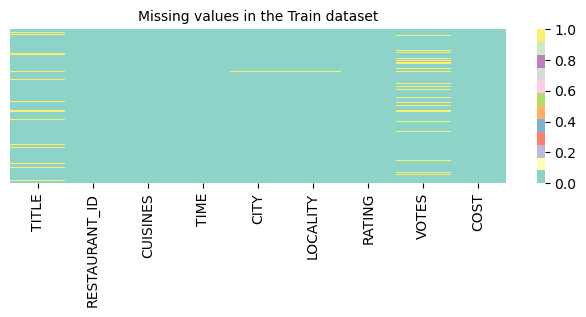

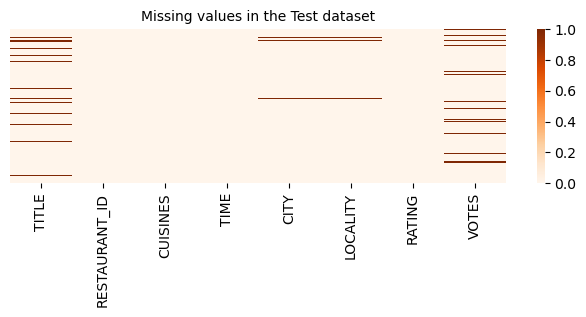

In [142]:
#Let's visualize missing values for train dataset using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='Set3')
plt.title('Missing values in the Train dataset', fontsize=10);


#Let's visualize missing values for test dataset using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='Oranges')
plt.title('Missing values in the Test dataset', fontsize=10);


**We can see Both of the Datasets(train and test) have null values**

# Unique Values

In [143]:
unique_values=df_train.nunique().to_frame("No.of Train unique Values")
unique_values["No.of Test unique Values"]=df_test.nunique()

unique_values

,No.of Train unique Values,No.of Test unique Values
TITLE,112,85.0
RESTAURANT_ID,11892,4127.0
CUISINES,4155,1727.0
TIME,2689,1183.0
CITY,359,151.0
LOCALITY,1416,834.0
RATING,32,31.0
VOTES,1847,1136.0
COST,86,NaN


**From above analysis(unique values)**

**1)Restaurant_Id has same unique values as the dataset rows,this column only help to identify the record of the restaurant but does'nt influence the target variable,so we can drop it**

**2)Other features(expect target variable) are in object type(categorical)**

# Dropping The Column

**Reason for dropping the column mentioned previously**

## Train Dataset

In [144]:
df_train.drop(['RESTAURANT_ID'], axis=1, inplace=True)

In [145]:
df_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


## Test Dataset

In [146]:
df_test.drop(['RESTAURANT_ID'], axis=1, inplace=True)

In [147]:
df_test.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [148]:
#checking the new dimension and Columns of the train and test dataset

print(f"The rows and columns in the train dataset: {df_train.shape}")



print(f"The rows and columns in the test dataset: {df_test.shape}")

The rows and columns in the train dataset: (12690, 8)
The rows and columns in the test dataset: (4231, 7)


# Categorical variables unique values

In [149]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df_train.dtypes.index:
    if df_train.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: {categorical_col}")
print(f"Numerical Columns: {numerical_col}")

Categorical Columns: ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']
Numerical Columns: ['COST']


In [150]:
# Checking the value counts of the categorical independent variables
for col in categorical_col:
    display(df_train[col].value_counts())

TITLE
QUICK BITES               4218
CASUAL DINING             3652
CAFÉ                       607
DESSERT PARLOR             382
CASUAL DINING,BAR          349
                          ... 
BAKERY,FOOD COURT            1
CLUB,MICROBREWERY            1
QUICK BITES,FOOD TRUCK       1
BAKERY,BEVERAGE SHOP         1
BAR,MICROBREWERY             1
Name: count, Length: 112, dtype: int64

CUISINES
South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, European, North Indian      1
Cafe, Continental, Italian, Lebanese            1
Finger Food, Continental, Asian, Chinese        1
Name: count, Length: 4155, dtype: int64

TIME
11am – 11pm (Mon-Sun)                                 1415
12noon – 12midnight (Mon-Sun)                          469
12noon – 11pm (Mon-Sun)                                407
11am – 12midnight (Mon-Sun)                            310
10am – 10pm (Mon-Sun)                                  221
                                                      ... 
10am – 10pm (Mon-Fri),8:30am – 10pm (Sat-Sun)            1
12noon – 3:30pm, 6pm – 10:30pm (Mon-Thu),12noon...       1
12noon – 5:30pm, 7pm – 11pm (Mon-Sun)                    1
12midnight – 11:45pm (Mon-Sun)                           1
12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...          1
Name: count, Length: 2689, dtype: int64

CITY
Chennai                                                                           2174
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1321
                                                                                  ... 
Gachibowli Hyderabad                                                                 1
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -       1
ECR NEELANKARAI Chennai 600115                                                       1
ward X11                                                                             1
Masab Tank                                                                           1
Name: count, Length: 359, dtype: int64

LOCALITY
Gachibowli                 166
Indiranagar                138
Edappally                  122
Kakkanad                   121
HSR                        120
                          ... 
Huda Market                  1
OMR Road Sholinganallur      1
Telangana 500053             1
1st Lane                     1
Near Malviya Nagar           1
Name: count, Length: 1416, dtype: int64

RATING
3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: count, dtype: int64

VOTES
44 votes      71
29 votes      66
28 votes      66
38 votes      65
35 votes      64
              ..
1020 votes     1
4634 votes     1
2297 votes     1
1475 votes     1
1214 votes     1
Name: count, Length: 1847, dtype: int64

**This all are unique value for Categorical columns**

# Numerical variables unique values

### Target Feature

In [151]:
# Checking the value counts of the Numerical variables
for col in numerical_col:
    display(df_train[col].value_counts())

COST
300      1595
400      1357
500      1300
200      1031
600       806
         ... 
8000        1
14000       1
5200        1
80          1
70          1
Name: count, Length: 86, dtype: int64

### This all are unique value for Numerical columns

# Filling null values

In [152]:
#Checking the null values

missing_val=df_train.isnull().sum().to_frame("Missing in Train Dataset")

missing_val["Missing in Test Dataset"]=df_test.isnull().sum()

missing_val

,Missing in Train Dataset,Missing in Test Dataset
TITLE,1003,284.0
CUISINES,0,0.0
TIME,0,0.0
CITY,112,35.0
LOCALITY,98,30.0
RATING,2,2.0
VOTES,1204,402.0
COST,0,NaN


**Votes column have 1204 null values in train dataset and 402 in test dataset,if we fill this it will affect our performance,dropping the column is the better way to do**

### Train Dataset

In [153]:
df_train.drop(['VOTES'], axis=1, inplace=True)

In [154]:
df_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300


### Test Dataset

In [155]:
df_test.drop(['VOTES'], axis=1, inplace=True)

In [156]:
df_test.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8
3,NaN,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6


In [157]:
#checking the new dimension and Columns of the train and test dataset

print(f"The rows and columns in the train dataset: {df_train.shape}")



print(f"The rows and columns in the test dataset: {df_test.shape}")

The rows and columns in the train dataset: (12690, 7)
The rows and columns in the test dataset: (4231, 6)


### Filling null values in train dataset

In [158]:
df_train["TITLE"] = df_train["TITLE"].fillna(df_train["TITLE"].mode()[0])

df_train["CITY"] = df_train["CITY"].fillna(df_train["CITY"].mode()[0])

df_train["LOCALITY"] = df_train["LOCALITY"].fillna(df_train["LOCALITY"].mode()[0])

df_train["RATING"] = df_train["RATING"].fillna(df_train["RATING"].mode()[0])

### Filling null values in test dataset

In [159]:
df_test["TITLE"] = df_test["TITLE"].fillna(df_test["TITLE"].mode()[0])

df_test["CITY"] = df_test["CITY"].fillna(df_test["CITY"].mode()[0])

df_test["LOCALITY"] = df_test["LOCALITY"].fillna(df_test["LOCALITY"].mode()[0])

df_test["RATING"] = df_test["RATING"].fillna(df_test["RATING"].mode()[0])

**We can use mean for rating to fill the null values but it in object datatype because it have NEW,- value like this**

In [160]:
# Again Checking the null values

missing_val=df_train.isnull().sum().to_frame("Missing in Train Dataset")

missing_val["Missing in Test Dataset"]=df_test.isnull().sum()

missing_val

,Missing in Train Dataset,Missing in Test Dataset
TITLE,0,0.0
CUISINES,0,0.0
TIME,0,0.0
CITY,0,0.0
LOCALITY,0,0.0
RATING,0,0.0
COST,0,NaN


**Now,We can see there is no null value presented in the Dataset**

# Checking for duplicated rows

In [161]:
print("Total no. of duplicated rows in train Dataset:",df_train.duplicated().sum())

Total no. of duplicated rows in train Dataset: 28


In [162]:
print("Total no. of duplicated rows in test Dataset:",df_test.duplicated().sum())

Total no. of duplicated rows in test Dataset: 6


# Dropping Duplicated Rows

In [163]:
df_train=df_train.drop_duplicates()  #dropping duplicate rows for train Dataset

In [164]:
df_test=df_test.drop_duplicates()  #dropping duplicate rows for test Dataset

In [165]:
#checking the new dimension and Columns of the train and test dataset

print(f"The rows and columns in the train dataset: {df_train.shape}")



print(f"The rows and columns in the test dataset: {df_test.shape}")

The rows and columns in the train dataset: (12662, 7)
The rows and columns in the test dataset: (4225, 6)


# Summary statistics of the numerical variables

### Target Feature

In [166]:
df_train.describe()

,COST
count,12662.000000
mean,655.504739
std,627.427068
min,20.000000
25%,300.000000
50%,500.000000
75%,800.000000
max,14000.000000


**1)There is no missing values**

**2)The mean value is greater than the median(50%)  which means the data is skewed to right.**

**3)There is a huge difference between 75% and max  hence there are outliers present in the data.**

**4)we can also notice the**

**==>standard deviation**

**==>min**

**==>25% percentile value for all column from this describe method.**

# Summary statistics of the categorical variables

In [167]:
df_train.describe(exclude=[np.number])

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING
count,12662,12662,12662,12662,12662,12662
unique,112,4155,2689,359,1416,32
top,QUICK BITES,South Indian,11am – 11pm (Mon-Sun),Chennai,Gachibowli,3.9
freq,5211,531,1414,2285,264,1235


**Here we can see the number of unique values for each categorical variable as well as the most frequent value.**

# Encoding the  features using OrdinalEncoder

In [168]:
OE = OrdinalEncoder()

for i in ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING']:
    df_train[i] = OE.fit_transform(df_train[i].values.reshape(-1, 1))
    df_test[i] = OE.fit_transform(df_test[i].values.reshape(-1, 1))

In [169]:
df_train.head() #Train dataset after Encoding

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST
0,31.0,2627.0,739.0,320.0,285.0,17.0,1200
1,33.0,289.0,1885.0,67.0,1046.0,23.0,1500
2,31.0,2976.0,661.0,67.0,1101.0,19.0,800
3,94.0,4130.0,275.0,222.0,136.0,22.0,800
4,50.0,1766.0,615.0,222.0,620.0,19.0,300


In [170]:
df_test.head()  #Test dataset after Encoding

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING
0,23.0,1293.0,503.0,110.0,662.0,23.0
1,74.0,1632.0,933.0,96.0,221.0,22.0
2,23.0,1455.0,219.0,96.0,411.0,18.0
3,74.0,208.0,1071.0,41.0,456.0,18.0
4,74.0,1637.0,208.0,78.0,300.0,16.0


# Data Visualisation

## Univarite Analysis

## Target feature

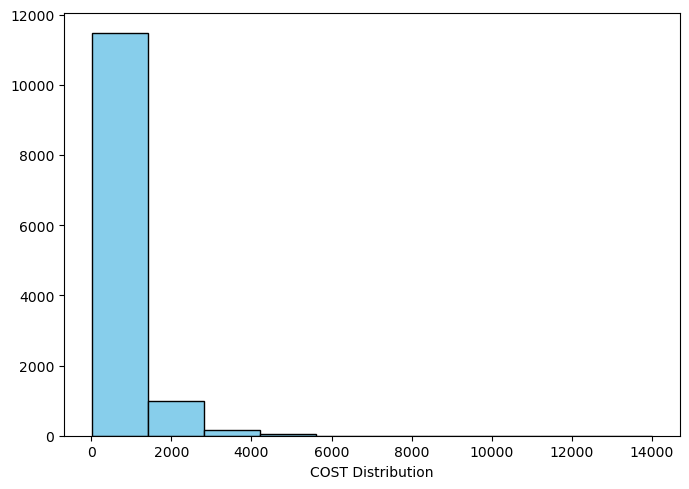

,count
COST,
300,1592
400,1356
500,1297
200,1028
600,805
...,...
8000,1
14000,1
5200,1


In [171]:
plt.figure(figsize=(7,5))
plt.hist(df_train['COST'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("COST Distribution")
plt.tight_layout()
plt.show()

df_train['COST'].value_counts().to_frame()

**The Cost  Occurs between 0 to 6000**

# TITLE

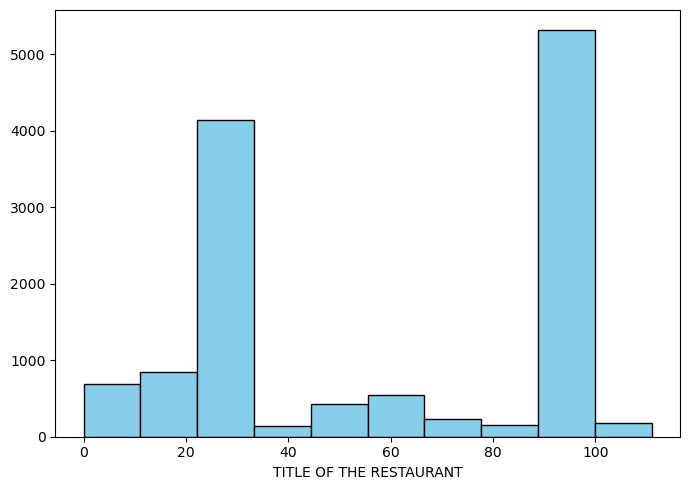

,count
TITLE,
94.0,5211
31.0,3644
22.0,605
50.0,381
33.0,349
...,...
5.0,1
45.0,1
102.0,1


In [172]:
plt.figure(figsize=(7,5))
plt.hist(df_train['TITLE'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("TITLE OF THE RESTAURANT")
plt.tight_layout()
plt.show()

df_train['TITLE'].value_counts().to_frame()

**We encoded the title of the restaurant so only we can see the numbers of the restaurant title ,with the encoded number we can see the restaurant title**

# CUISINES

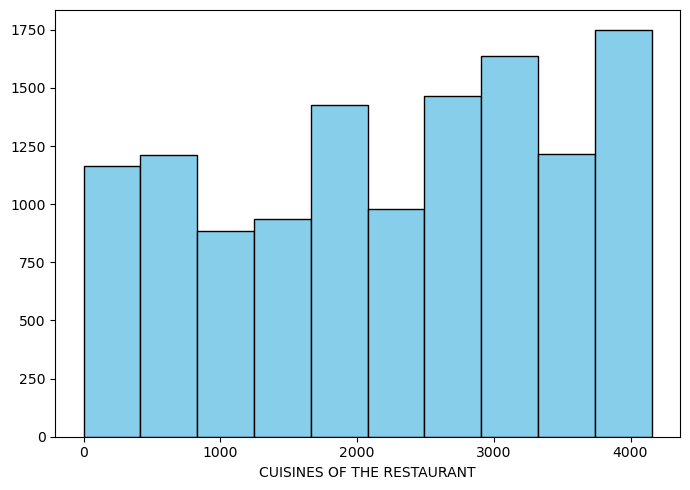

,count
CUISINES,
3801.0,531
2850.0,524
2946.0,500
1893.0,286
1095.0,167
...,...
353.0,1
2376.0,1
132.0,1


In [173]:
plt.figure(figsize=(7,5))
plt.hist(df_train['CUISINES'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("CUISINES OF THE RESTAURANT")
plt.tight_layout()
plt.show()

df_train['CUISINES'].value_counts().to_frame()

**We encoded the CUISINES	 of the restaurant so only we can see the numbers of the restaurant CUISINES, with the encoded number we can see the restaurant CUISINES**

# TIME

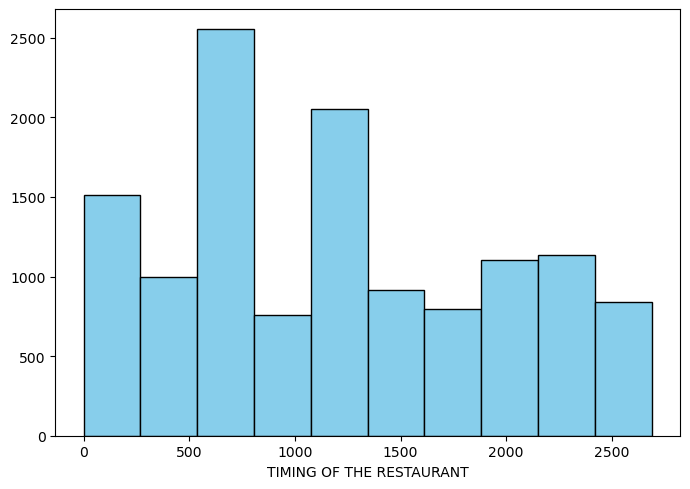

,count
TIME,
555.0,1414
1156.0,468
1123.0,405
596.0,309
99.0,221
...,...
1449.0,1
965.0,1
969.0,1


In [174]:
plt.figure(figsize=(7,5))
plt.hist(df_train['TIME'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("TIMING OF THE RESTAURANT")
plt.tight_layout()
plt.show()

df_train['TIME'].value_counts().to_frame()

**We encoded the TIMING of the restaurant so only we can see the numbers of the restaurant TIMING ,with the encoded number we can see the restaurant TIMING**

# CITY

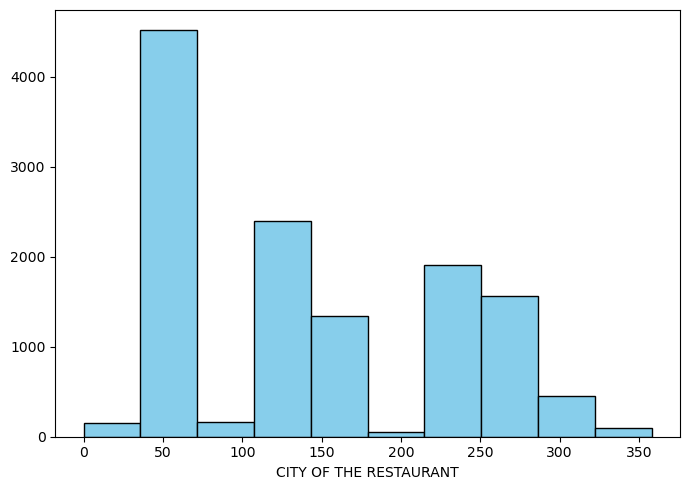

,count
CITY,
67.0,2285
37.0,2145
131.0,1819
222.0,1713
252.0,1317
...,...
111.0,1
62.0,1
98.0,1


In [175]:
plt.figure(figsize=(7,5))
plt.hist(df_train['CITY'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("CITY OF THE RESTAURANT")
plt.tight_layout()
plt.show()

df_train['CITY'].value_counts().to_frame()

**We encoded the CITY of the restaurant so only we can see the numbers of the restaurant CITY ,with the encoded number we can see the restaurant CITY**

# LOCALITY

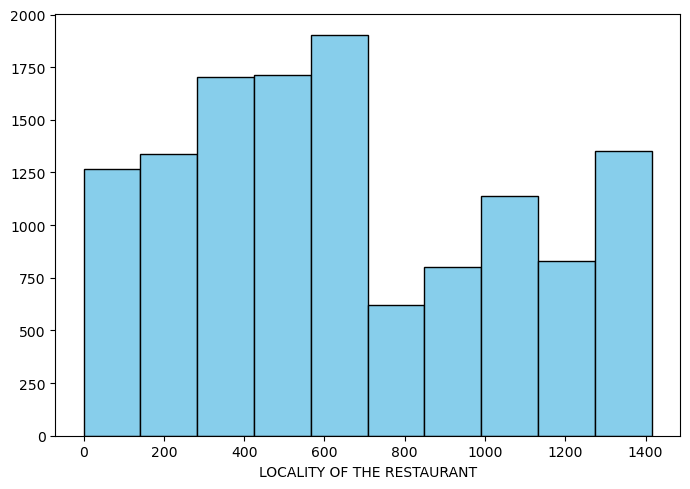

,count
LOCALITY,
342.0,264
430.0,137
309.0,122
484.0,121
397.0,119
...,...
416.0,1
898.0,1
1280.0,1


In [176]:
plt.figure(figsize=(7,5))
plt.hist(df_train['LOCALITY'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("LOCALITY OF THE RESTAURANT")
plt.tight_layout()
plt.show()

df_train['LOCALITY'].value_counts().to_frame()

**We encoded the LOCALITY of the restaurant so only we can see the numbers of the restaurant LOCALITY, with the encoded number we can see the restaurant LOCALITY**

# RATING

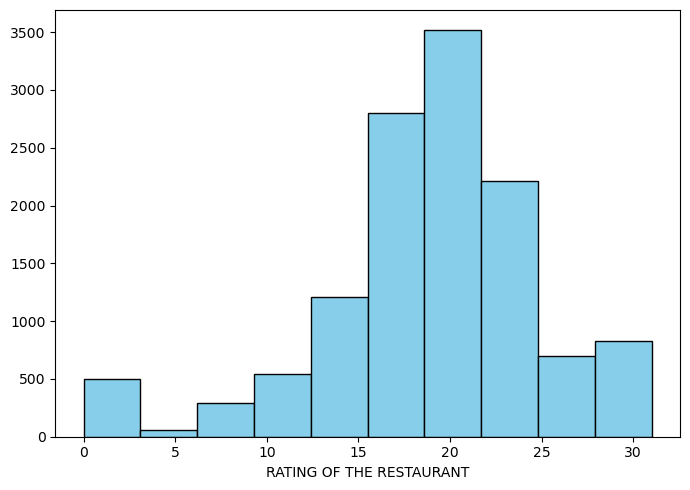

,count
RATING,
20.0,1235
19.0,1187
21.0,1094
18.0,1086
17.0,951
22.0,932
16.0,768
23.0,723
31.0,704


In [177]:
plt.figure(figsize=(7,5))
plt.hist(df_train['RATING'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("RATING OF THE RESTAURANT")
plt.tight_layout()
plt.show()

df_train['RATING'].value_counts().to_frame()

**We encoded the RATING of the restaurant so only we can see the numbers of the restaurant RATING, with the encoded number we can see the restaurant RATING**

# Correlation between target variable and independent variables

In [178]:
df_train.corr()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST
TITLE,1.000000,0.242539,0.055944,-0.013249,0.026792,-0.035376,-0.264500
CUISINES,0.242539,1.000000,0.105652,0.024103,0.017422,-0.038904,-0.014372
TIME,0.055944,0.105652,1.000000,-0.011289,-0.008690,-0.034219,0.018615
CITY,-0.013249,0.024103,-0.011289,1.000000,0.042993,0.026132,0.044868
LOCALITY,0.026792,0.017422,-0.008690,0.042993,1.000000,-0.022727,-0.015042
RATING,-0.035376,-0.038904,-0.034219,0.026132,-0.022727,1.000000,0.236995
COST,-0.264500,-0.014372,0.018615,0.044868,-0.015042,0.236995,1.000000


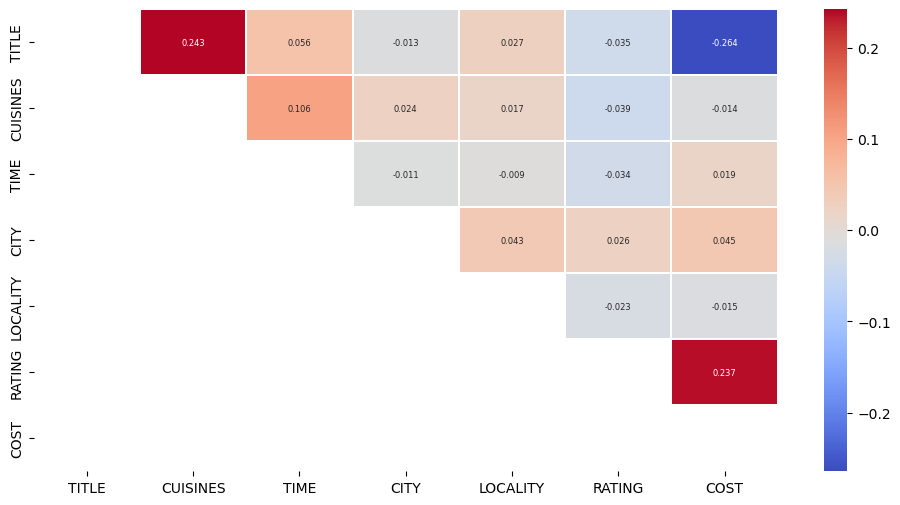

In [179]:
# Visualizing the correlation matrix by plotting heatmap

df_train_corr=df_train.corr()

lower_triangle=np.tril(df_train.corr())

plt.figure(figsize=(12,6))

sns.heatmap(df_train_corr,annot=True,annot_kws={"size":6},cmap='coolwarm',linewidths=0.1,fmt='.3f',mask=lower_triangle)

plt.show()

**==>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation**


**1) From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns**

**2)COST(Target variable) and TITLE are negatively correlated with a value of -0.264 (Moderate correlation).**

**3)COST(Target variable) and RATING are postively correlated with a value of 0.257 (Moderate correlation).**

**4)CUSINESS and TITLE are postively correlated with a value of 0.243 (Moderate correlation).**

# Checking outliers with box plot

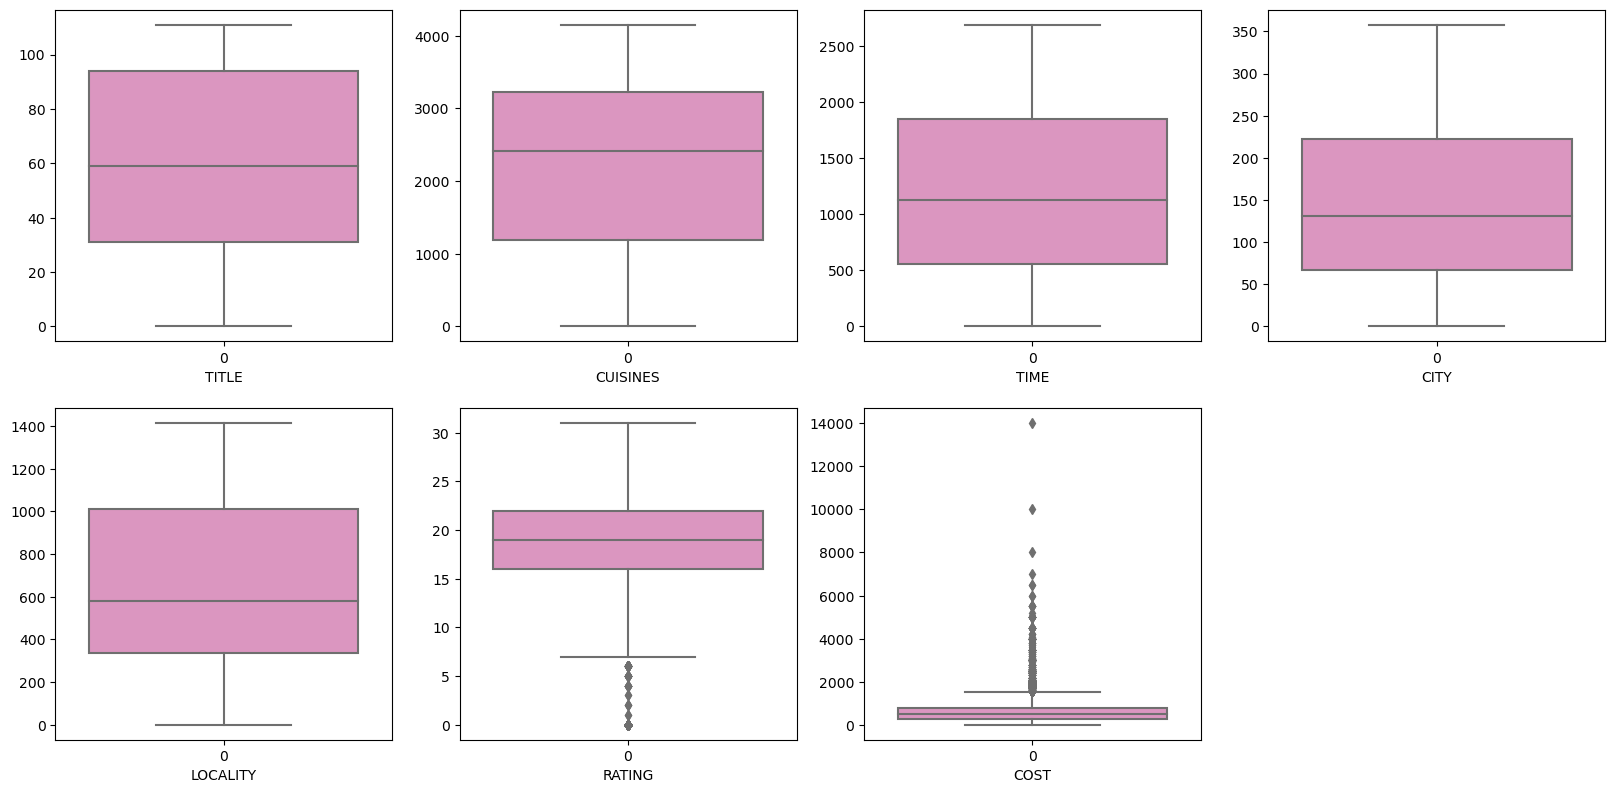

In [180]:
plt.figure(figsize=(20,25))
p=1
for i in df_train:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df_train[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
    
plt.show()

**We can see clearly outliers  presented in RATING,COST**

# Checking for skewness

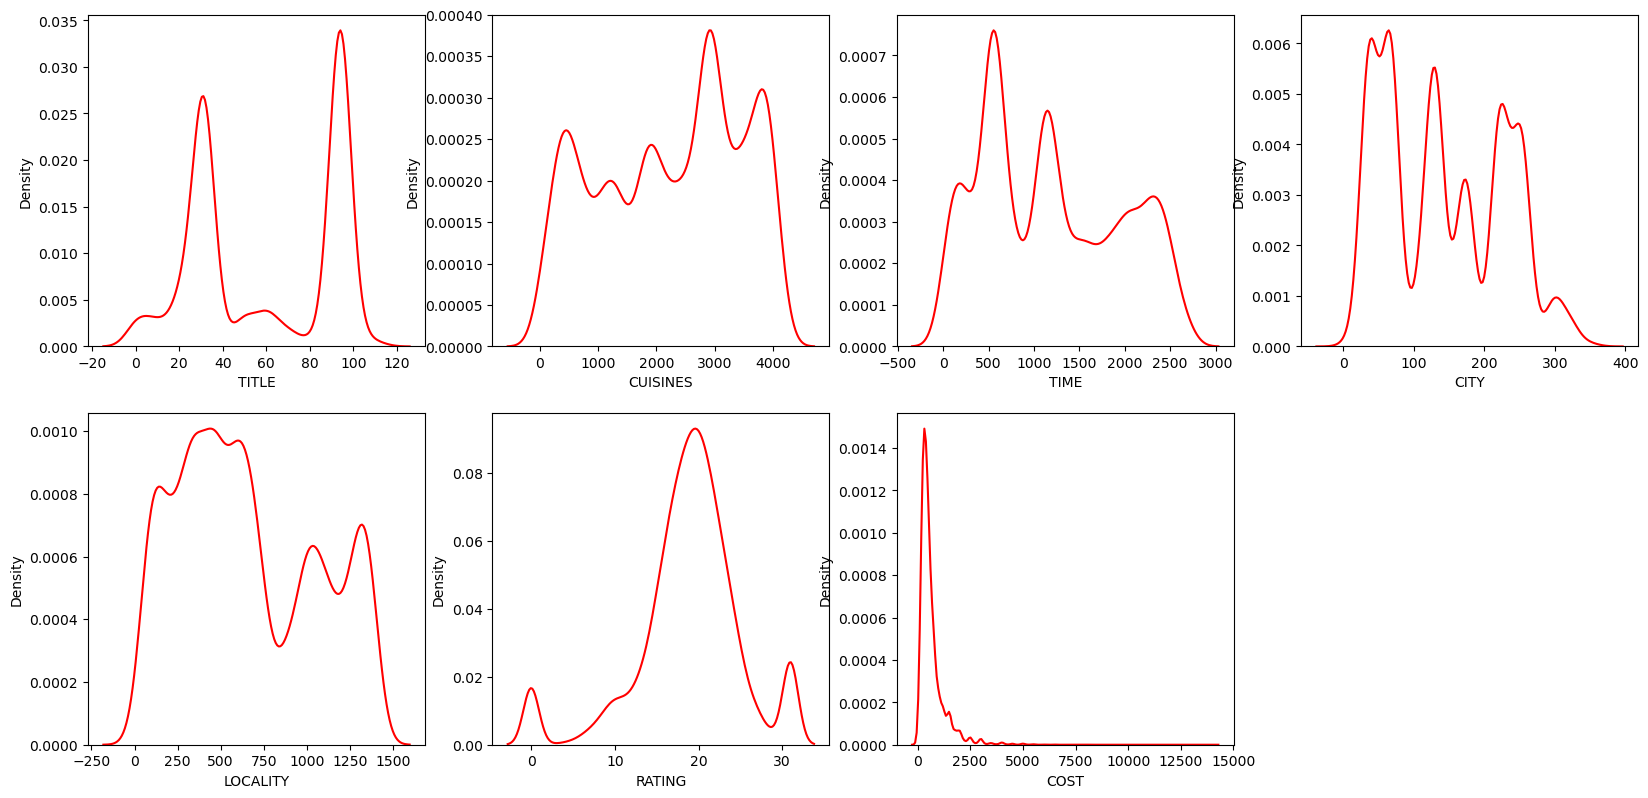

In [181]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df_train:
    if plotnumber<=13:
        plt.subplot(5,4,plotnumber)
        sns.distplot(df_train[i],color='r',hist=False)
        plt.xlabel(i)
    plotnumber+=1
    
plt.show()

**We can see clearly skewness presented in the columns**

**COST column is right skewed ,reducing skewness in the target variable can be beneficial**

**I checked my model performance with and without skewness ,outliers,my model performance was good when the skewness and outliers are removed.**

# Data Preprocessing

# Removing outliers

In [182]:
z = np.abs(zscore(df_train))  #Zscore method for removing outliers
z

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST
0,0.871683,0.325546,0.584711,2.119375,0.920656,0.290638,0.867857
1,0.810882,1.616382,0.934557,0.896341,0.986362,0.680696,1.346019
2,0.871683,0.615423,0.688117,0.896341,1.124188,0.033140,0.230307
3,1.043557,1.573928,1.199843,0.951232,1.294041,0.518807,0.230307
4,0.294071,0.389595,0.749100,0.951232,0.081167,0.033140,0.566630
...,...,...,...,...,...,...,...
12685,1.043557,0.580538,0.047797,0.133472,0.777818,0.033140,0.247855
12686,0.810882,0.076461,0.004049,0.951232,1.301559,0.842585,1.824181
12687,0.344342,0.122144,0.057077,1.153869,1.728119,0.356918,1.027244
12688,0.871683,1.055638,0.870923,0.896341,0.053602,0.452527,0.407242


In [183]:
# threshold = 3
df_train= df_train[(z<3).all(axis=1)]

In [184]:
print(f"The rows and columns in the new training dataset: {df_train.shape}")

The rows and columns in the new training dataset: (11947, 7)


**In the new dataset there are 11947 rows and 7 columns.**

In [185]:
df_train

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST
0,31.0,2627.0,739.0,320.0,285.0,17.0,1200
1,33.0,289.0,1885.0,67.0,1046.0,23.0,1500
2,31.0,2976.0,661.0,67.0,1101.0,19.0,800
3,94.0,4130.0,275.0,222.0,136.0,22.0,800
4,50.0,1766.0,615.0,222.0,620.0,19.0,300
...,...,...,...,...,...,...,...
12685,94.0,2934.0,1144.0,131.0,342.0,19.0,500
12686,33.0,2143.0,1177.0,222.0,133.0,24.0,1800
12687,71.0,2088.0,1137.0,239.0,1342.0,21.0,1300
12688,31.0,3506.0,1837.0,67.0,631.0,16.0,400


**The outlier removal must be done only on the training set to preserve the integrity of the test data.**

# Skewness Correction

In [186]:
# Checking the skewness in the data
df_train_skew = df_train.skew().sort_values(ascending=False).to_frame("Skewness")
df_train_skew

,Skewness
COST,1.738003
LOCALITY,0.344051
TIME,0.341605
CITY,0.308423
RATING,0.142275
TITLE,-0.082338
CUISINES,-0.215673


In [187]:
df_train_skew[(df_train_skew['Skewness'] > 0.5) | (df_train_skew['Skewness'] < -0.5)] #the features with a skew > 0.5 or -0.5

,Skewness
COST,1.738003


**Acceptance range for skewness is -0.5 to 0.5**

**Considering the skewness of the continuous numerical columns**

**==>COST(1.738003)**

In [188]:
# Checking skewness using cuberoot method , log method and square root
skew_columns = ['COST']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_train[col])
    df_transformed[f"{col}_log"] = np.log(df_train[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_train[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_train[skew_columns]], axis=1)

In [189]:
# Comparing which transform method give better results
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

,Skewness
COST_sqrt,0.977261
COST_log,0.171710
COST_cbrt,0.715922
COST,1.738003


**==>log method is better for COST.**

In [190]:
# Log transformation
df_train['COST'] = np.log(df_train['COST'])

In [191]:
df_train.skew().sort_values(ascending=False).to_frame("Skewness after transformation")

,Skewness after transformation
LOCALITY,0.344051
TIME,0.341605
CITY,0.308423
COST,0.171710
RATING,0.142275
TITLE,-0.082338
CUISINES,-0.215673


**Skewness removed for COST**

# Separating features and label

In [192]:
x=df_train.drop('COST',axis=1)
y=df_train['COST']

In [193]:
print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (11947, 6)
Label Dimension = (11947,)


# Feature Scaling using Standard Scalarization

In [194]:
scaler = StandardScaler()

# Scaling training data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

# Scaling testing data
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns = df_test.columns)

In [195]:
x.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING
0,-0.874799,0.325769,-0.562751,2.102027,-0.917979,-0.499672
1,-0.814271,-1.608855,0.971542,-0.869164,0.988468,0.700324
2,-0.874799,0.614556,-0.667180,-0.869164,1.126253,-0.099673
3,1.031834,1.569456,-1.183966,0.951131,-1.291251,0.500325
4,-0.299783,-0.386682,-0.728766,0.951131,-0.078742,-0.099673


In [240]:
y.head()

0    7.090077
1    7.313220
2    6.684612
3    6.684612
4    5.703782
Name: COST, dtype: float64

In [196]:
df_test.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING
0,-0.865970,0.732516,-0.060454,1.336780,1.185448,0.856933
1,1.059097,1.412578,1.202501,0.975152,-0.691133,0.694526
2,-0.865970,1.057502,-0.894591,0.975152,0.117371,0.044897
3,1.059097,-1.444082,1.607821,-0.445526,0.308859,0.044897
4,1.059097,1.422608,-0.926899,0.510203,-0.354965,-0.279917


# Muticollinearity Analysis and Feature Selection

In [197]:
missing_values = x.isnull().sum()
missing_values

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
dtype: int64

**There is no null values presented in the columns**

# Checking Variance Inflation Factor (VIF)

In [198]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
1,CUISINES,1.074513
0,TITLE,1.067482
2,TIME,1.016068
5,RATING,1.014138
3,CITY,1.009737
4,LOCALITY,1.004085


**If VIF value is greater than 10,consider it as a sign of multicollinearity but our features does not have the value greater than 10.**

# Modeling

# Finding the best random state

In [199]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

Best Accuracy is  0.5540929641331589 at random state 124


# Creating train test split

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

# Creating a Function with R2_score,Mean_Absolute_Error,Mean_Squared_Error ,Mean_Squared_Error and Random_mean_squared_error difference between R2 score and cross validation

In [205]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"R2_Score:{r2_score(y_train,y_pred)*100:.2f}%")  #r2_score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f"R2_Score:{r2_score(y_test,pred)*100:.2f}%")  #r2_score for test result
        
        print("\n Mean_Absolute_Error:",mean_absolute_error(y_test,pred))
        
        print("\n Mean_Squared_Error:",mean_squared_error(y_test,pred))
        
        print("\n Random_mean_squared_error:",np.sqrt(mean_squared_error(y_test,pred)))
              
        
        score=cross_val_score(clf,x,y)
        print('\n',score)
        print('\n',score.mean())
        print("\n Difference between R2_score and cross validation is:",r2_score(y_test,pred)-score.mean()) #Difference between r2_score and cross validation(to find which model is best)

# LinearRegression

In [206]:
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [207]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:22.91%

================Test Result=============
R2_Score:21.62%

 Mean_Absolute_Error: 0.46943217329272474

 Mean_Squared_Error: 0.3699601636125858

 Random_mean_squared_error: 0.6082435068396421

 [0.21543053 0.22824229 0.23279688 0.20817357 0.2342461 ]

 0.22377787418419995

 Difference between R2_score and cross validation is: -0.007569724621626667


# RandomForestRegressor

In [209]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)

RandomForestRegressor()

In [210]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:95.38%

================Test Result=============
R2_Score:66.17%

 Mean_Absolute_Error: 0.3074780882871343

 Mean_Squared_Error: 0.15967097289584145

 Random_mean_squared_error: 0.39958850445907657

 [0.66254386 0.65585641 0.68064665 0.65712565 0.70056836]

 0.6713481861425101

 Difference between R2_score and cross validation is: -0.00962462673309461


# KNeighborsRegressor

In [211]:
clf=knn()
clf.fit(x_train,y_train)

KNeighborsRegressor()

In [212]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:60.32%

================Test Result=============
R2_Score:39.67%

 Mean_Absolute_Error: 0.40587726741532393

 Mean_Squared_Error: 0.2847707356116342

 Random_mean_squared_error: 0.5336391436276336

 [0.38041726 0.37341587 0.40230314 0.37977962 0.43354257]

 0.3938916911219791

 Difference between R2_score and cross validation is: 0.0027974560663081016


# GradientBoostingRegressor

In [213]:
clf=GradientBoostingRegressor()
clf.fit(x_train,y_train)

GradientBoostingRegressor()

In [214]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:67.72%

================Test Result=============
R2_Score:63.93%

 Mean_Absolute_Error: 0.322311858040937

 Mean_Squared_Error: 0.17026774038251158

 Random_mean_squared_error: 0.4126351177281347

 [0.64498572 0.63013312 0.64833053 0.64260806 0.67661398]

 0.6485342836871497

 Difference between R2_score and cross validation is: -0.009260871114975311


# Ridge

In [215]:
clf=Ridge()
clf.fit(x_train,y_train)

Ridge()

In [216]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:22.91%

================Test Result=============
R2_Score:21.62%

 Mean_Absolute_Error: 0.4694333834106165

 Mean_Squared_Error: 0.3699597356932972

 Random_mean_squared_error: 0.6082431550731148

 [0.21543121 0.2282432  0.23279553 0.20817535 0.23424474]

 0.22377800462064448

 Difference between R2_score and cross validation is: -0.007568948474919762


# DecisionTreeRegressor

In [218]:
clf= DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [219]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:100.00%

================Test Result=============
R2_Score:37.51%

 Mean_Absolute_Error: 0.4175552607600938

 Mean_Squared_Error: 0.29496328888592366

 Random_mean_squared_error: 0.5431052281887219

 [0.35599523 0.36344731 0.38197323 0.36540332 0.43837304]

 0.38103842880634514

 Difference between R2_score and cross validation is: -0.0059430665097285895


# SVR

In [220]:
clf=SVR()
clf.fit(x_train,y_train)

SVR()

In [221]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:46.63%

================Test Result=============
R2_Score:42.40%

 Mean_Absolute_Error: 0.3972592664679349

 Mean_Squared_Error: 0.2718575653838893

 Random_mean_squared_error: 0.5213996215801171

 [0.42453847 0.40066566 0.42575998 0.41927811 0.46967066]

 0.42798257536445383

 Difference between R2_score and cross validation is: -0.0039357865074372


# ExtraTreesRegressor

In [222]:
clf=ExtraTreesRegressor()
clf.fit(x_train,y_train)

ExtraTreesRegressor()

In [223]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:100.00%

================Test Result=============
R2_Score:64.87%

 Mean_Absolute_Error: 0.3161522250146608

 Mean_Squared_Error: 0.16582651948049482

 Random_mean_squared_error: 0.40721802450345296

 [0.64869781 0.64510374 0.66306428 0.63800122 0.68571155]

 0.6561157194686187

 Difference between R2_score and cross validation is: -0.0074332053461534375


## Checking Difference between r2_score and cross validation,the model RandomForestRegressor has lowest value so RandomForestRegressor is our best model.

# Hyperparameter Tuning

In [230]:
param = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split':[2,5,10],
      'min_samples_leaf':[2,4,6]
}


In [231]:
gscv=GridSearchCV(RandomForestRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [232]:
gscv.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

# Final Model

In [233]:
RFC_model=RandomForestRegressor(max_features='sqrt',
                                    max_depth=20,
                                    min_samples_leaf=2,
                                    min_samples_split=5,
                                    n_estimators=200)

In [234]:
RFC_model.fit(x_train,y_train)
pred=RFC_model.predict(x_test)
r2_score=r2_score(y_test,pred)
print(r2_score*100)

63.147070771448234


# Saving The Model

In [235]:
joblib.dump(RFC_model,'Restaurant Food Cost project.pkl')

['Restaurant Food Cost project.pkl']

# Predicting the saved model

In [236]:
model=joblib.load('Restaurant Food Cost project.pkl')

In [237]:
prediction=model.predict(x_test)
prediction

array([6.653755  , 6.17766216, 6.24760074, ..., 6.96899008, 5.72527588,
       7.09682155])

In [238]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["original"]=a
df

,Predicted,original
0,6.653755,6.551080
1,6.177662,6.551080
2,6.247601,6.907755
3,6.017003,5.857933
4,5.551094,5.521461
...,...,...
3580,6.547665,6.551080
3581,6.209467,5.991465
3582,6.968990,7.090077
3583,5.725276,4.605170


**The values are in log transform ,we can convert it into normal form**

# Predicting on testing data

In [241]:
# Prediction on the testing data provided
prediction = model.predict(df_test)

df_final = df_test.copy()
df_final['COST'] = prediction

df_final.to_csv("Restaurant_food_cost_predicted_final.csv")
df_final

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST
0,-0.865970,0.732516,-0.060454,1.336780,1.185448,0.856933,7.020471
1,1.059097,1.412578,1.202501,0.975152,-0.691133,0.694526,5.860127
2,-0.865970,1.057502,-0.894591,0.975152,0.117371,0.044897,6.595788
3,1.059097,-1.444082,1.607821,-0.445526,0.308859,0.044897,5.740824
4,1.059097,1.422608,-0.926899,0.510203,-0.354965,-0.279917,5.863681
...,...,...,...,...,...,...,...
4220,-0.865970,0.997319,-1.235295,1.285119,0.908854,0.207304,6.748544
4221,1.059097,-1.325723,-0.768296,-1.272103,-0.623048,0.856933,6.166302
4222,1.059097,-0.499217,1.552016,-0.445526,1.330128,-0.117510,5.806207
4223,1.059097,1.230025,-0.906339,0.510203,-0.218796,-2.878430,5.915938


**COST column in log form ,we can convert it in normal form**

# Conclusion

### 1)The best model was RandomForestRegressor

### 2)COST are in log form,we can convert it in normal form any time